### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
df = pd.read_csv("hotel_booking.csv")

### EDA & Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Changing data type of reservation_status_date
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [11]:
for column in df.describe(include='object').columns:
    print(column)
    print(df[column].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [12]:
# to check null values in data
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [13]:
df.drop(["company","agent"], inplace=True, axis=1)

In [14]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
# to check outliers
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [16]:
#adr is average dailyrate
df = df[df['adr']<5000]

# Data Analysis and Visualization

**The percentage of people who canceled their reservastion**

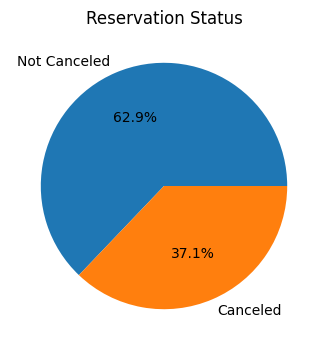

In [17]:
cancle_per = df['is_canceled'].value_counts(normalize = True)
plt.figure(figsize=(5,4))
plt.title("Reservation Status")
plt.pie(cancle_per,labels=["Not Canceled", "Canceled"], autopct="%.1f%%")
plt.show()

Pie chart shows percentage of result that are canceled and not canceled. There are 37% of client whoe are canceled the reserv. Which is huge impact on Hotel revenue.

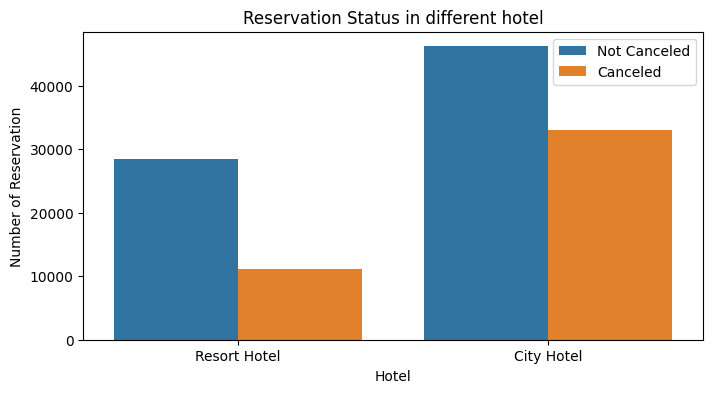

In [18]:
# lets see which Hotel has highest cancellation ratio
plt.figure(figsize=(8,4))
xy = sns.countplot(x = 'hotel', hue = 'is_canceled', data= df)
plt.title("Reservation Status in different hotel")
plt.xlabel("Hotel")
plt.ylabel("Number of Reservation")
plt.legend(["Not Canceled","Canceled"])

Bar Graph show the City hotel have more booking as compare to resort hotel. its possible that resort's are more expensive than city hotels.

In [19]:
# Lets see how percentage of canceled in city hotel
city_h = df[df["hotel"] == "City Hotel"]
city_h['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [20]:
# Lets see how percentage of canceled in resort
resort_h = df[df["hotel"] == "Resort Hotel"]
resort_h['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [24]:
# lets see price effect on the cancelation on hotels USING "adr"
city_h = city_h.groupby('reservation_status_date')[['adr']].mean()
resort_h = resort_h.groupby('reservation_status_date')[['adr']].mean()


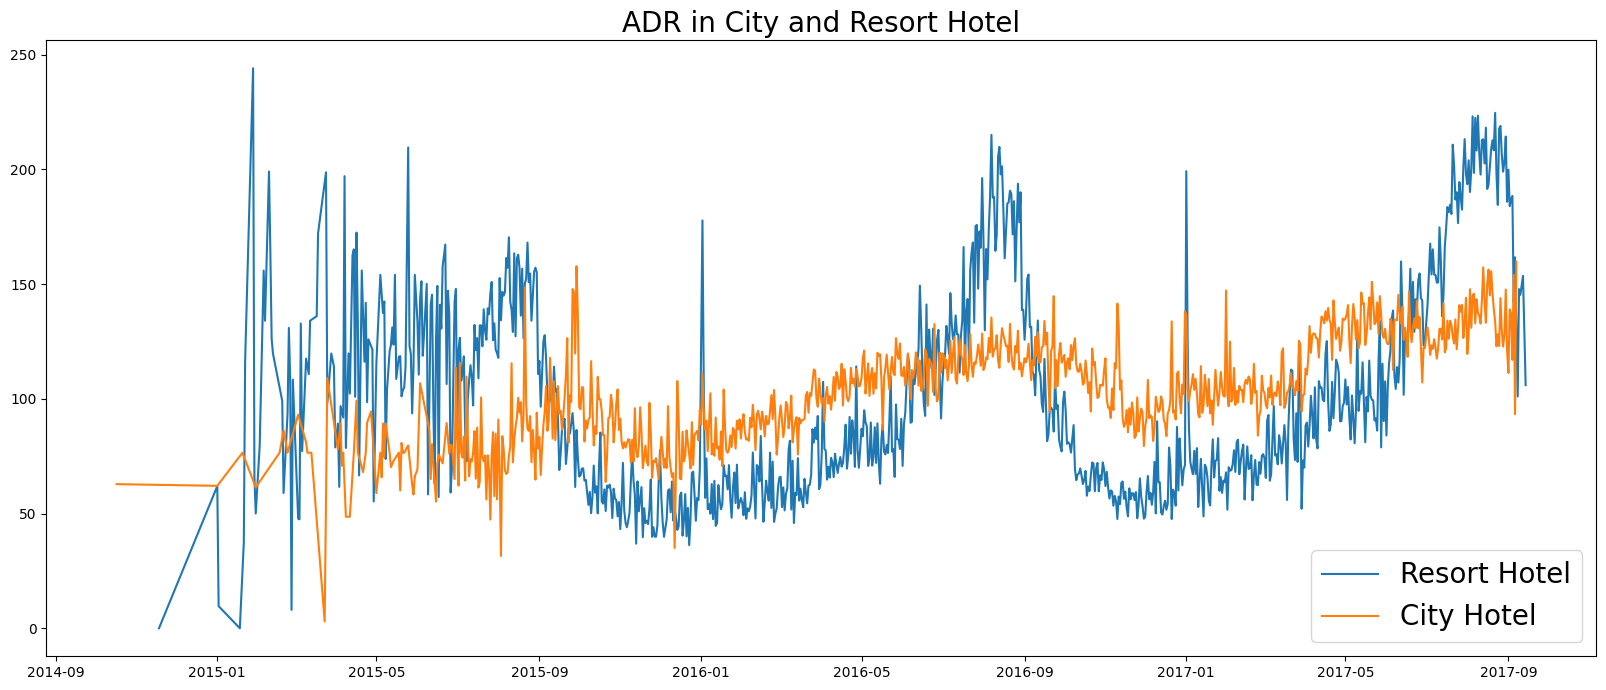

In [25]:
plt.figure(figsize= (20,8))
plt.title('ADR in City and Resort Hotel', fontsize = 20)
plt.plot(resort_h.index, resort_h['adr'], label = 'Resort Hotel')
plt.plot(city_h.index, city_h['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

The line graph shows that on some days the adr for city hotel is less then resort hotel, and on other days it is less. so weedkends and holidays may see a rise in resort hotel rates.

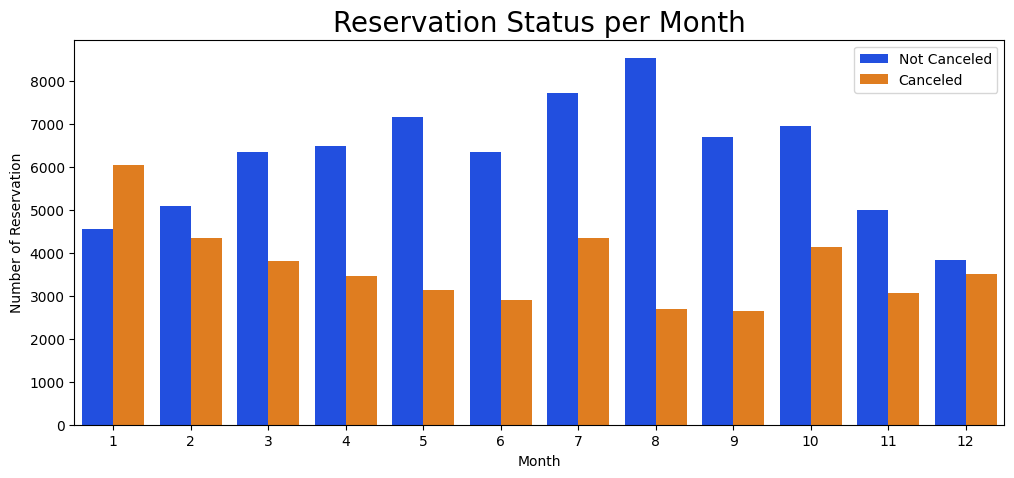

In [39]:
# ploting a graph to see month wise booking and cancelation
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (12,5))
xy = sns.countplot(x = 'month', hue = 'is_canceled', data = df,palette='bright')
legend_labels = xy.get_legend_handles_labels()
xy.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per Month', size = 20)
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled', 'Canceled'])

**to check any effect because of price bookings are canceled**

<Axes: title={'center': 'ADR per Month'}, xlabel='month', ylabel='adr'>

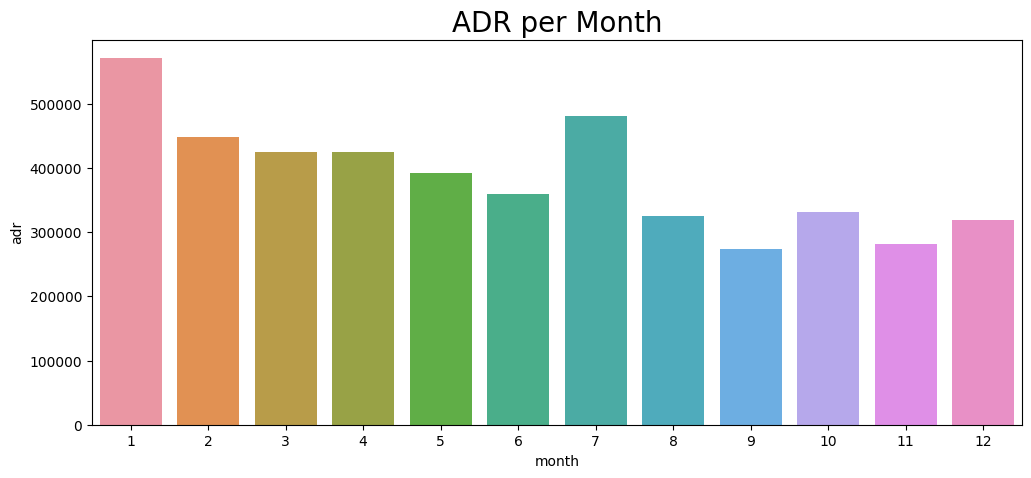

In [40]:
# ploting Average adr for each month (Cancelation only)
plt.figure(figsize = (12,5))
plt.title("ADR per Month", fontsize = 20)
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())

As Compare to Above both graph it shows in 9(sept month) low adr and less cancelation. and Highest adr & cancelation in 1(jan month) so it proves when prices is high then cancelation also increses.
"The cost of accommodetion is for Cancelation"

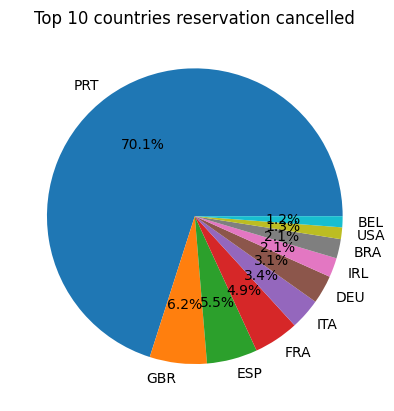

In [41]:
#lets see top 10 countries reservation cancellation rate
cancelled_data = df[df['is_canceled'] == 1]
top10_country = cancelled_data['country'].value_counts()[:10]
plt.title("Top 10 countries reservation cancelled")
plt.pie(top10_country, autopct='%.1f%%' ,labels = top10_country.index)
plt.show()

We see In Portugl country has higest cancelletion rate around 70% then UK, Spain and so on.
so suggestion for PRT is they need to provide more facilities in affordable price, pramotional discounts, marketing etc.

In [42]:
#lets see clients where they are comming from offline, online travel agents etc
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [43]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

Most of the clients are coming form Online TA (47%), then Offline(20%) and so on.

In [44]:
#lets see how much cancellation percentage from offline, online etc travel agents
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

 Percentage of Cancelled reservation is Higher in Online TA.
 So Most bookings and cancellations are done through online travel agents